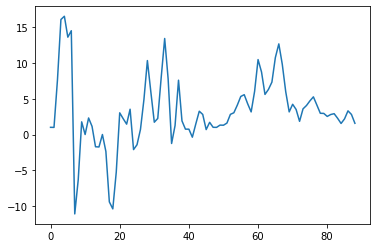

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

datos = pd.read_csv('Session4data.csv', sep=";",decimal=",")
yy = datos.iloc[:,1]

y = yy[0:89] # leave the last 6 observations to compare with the forecasted values

plt.plot(y)
plt.show()

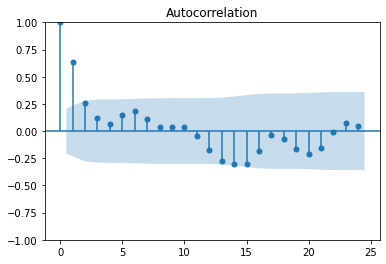

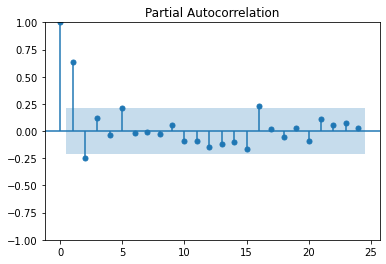

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 24 # play with this parameter

## Aquí si pongo 72 en nlags me da este error:
# ValueError: Can only compute partial correlations for lags up to 50% of the sample size.
# The requested nlags 72 must be < 48.
plot_acf(y, lags = nlags)
plt.show()

plot_pacf(y, lags = nlags,method="ols")
plt.show()

In [10]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("Estadistico:" , adf_test[0])
print("p-value:" , adf_test[1])

adf_test (-3.1137167859379775, 0.02555459814807376, 5, 83, {'1%': -3.5117123057187376, '5%': -2.8970475206326833, '10%': -2.5857126912469153}, 359.0430570006344)
Estadistico: -3.1137167859379775
p-value: 0.02555459814807376


C:\Users\usuario\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:              Inflation   No. Observations:                   89
Model:                     ARMA(2, 0)   Log Likelihood                -242.039
Method:                       css-mle   S.D. of innovations              3.658
Date:                Mon, 23 Jan 2023   AIC                            492.077
Time:                        20:34:10   BIC                            502.032
Sample:                             0   HQIC                           496.090
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.2221      0.848      3.800      0.000       1.560       4.884
ar.L1.Inflation     0.7930      0.102      7.778      0.000       0.593       0.993
ar.L2.Inflation    -0.2471      

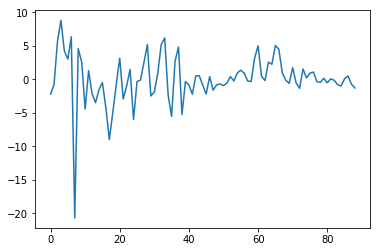

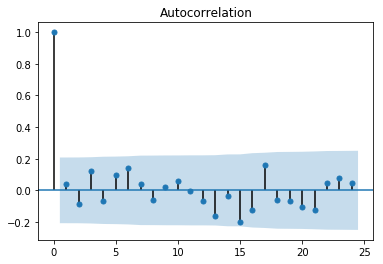

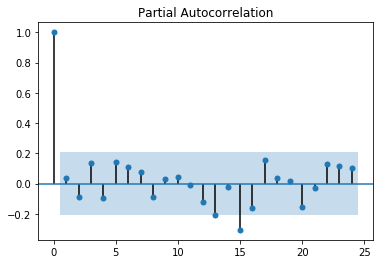

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fit = ARIMA(y, order = (2,0,0))
fit_fit=fit.fit(disp=0)
print(fit_fit.summary())
# print("Coefficients",fit_fit.params)

residuos=fit_fit.resid

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, lags = nlags)
plt.show()

In [12]:
adf_test = sm.tsa.stattools.adfuller(residuos,maxlag=10) 
print("adf_test", adf_test) # first output "The test statistic", second output "p-value"

adf_test (-3.9161512928448716, 0.001919146020174455, 4, 84, {'1%': -3.510711795769895, '5%': -2.8966159448223734, '10%': -2.5854823866213152}, 357.5177218916375)


LjungBox (array([21.31472585]), array([0.37882067]))
Shapido ShapiroResult(statistic=0.8471443057060242, pvalue=3.833534378827608e-08)


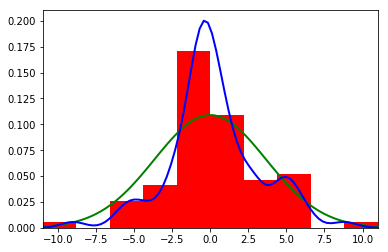

In [14]:
# Box test

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[20])

print("LjungBox", box_test) # first output "The test statistic", second output "p-value"

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normalitresiduos test

saphiro = shapiro(residuos)
print("Shapido", saphiro) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

point predictions [2.01373607 2.67235028 3.08469236 3.24897413 3.27738031 3.25931919]
forecasting errors [3.65822264 4.6689385  4.87341835 4.88907844 4.88920399 4.89078604]


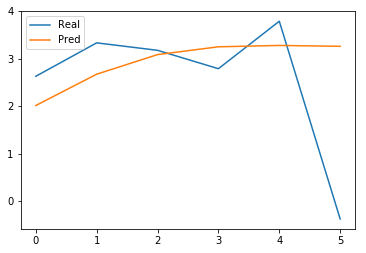

In [15]:
y_pred = fit_fit.forecast(steps = 6)
print("point predictions",y_pred[0])
print("forecasting errors",y_pred[1])
# Las predicciones dan 0, el modelo arriba que está con todos los parámetros en 0 salvo
# el 's' no sé si dará algún problema en Python y no lo haga como en R o me he equivocado en otro sitio
real =yy[-6:].reset_index(drop=True)
plt.plot(real, label = 'Real')
plt.plot(y_pred[0], label = 'Pred')
plt.legend()
plt.show()